In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [109]:
concrete= pd.read_csv("concrete.csv") 

In [110]:
concrete.shape

(1030, 9)

In [111]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## 1a)UNIVARIATE ANALYSIS

In [112]:
concrete.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [113]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [114]:
concrete.isnull().values.any() 

False

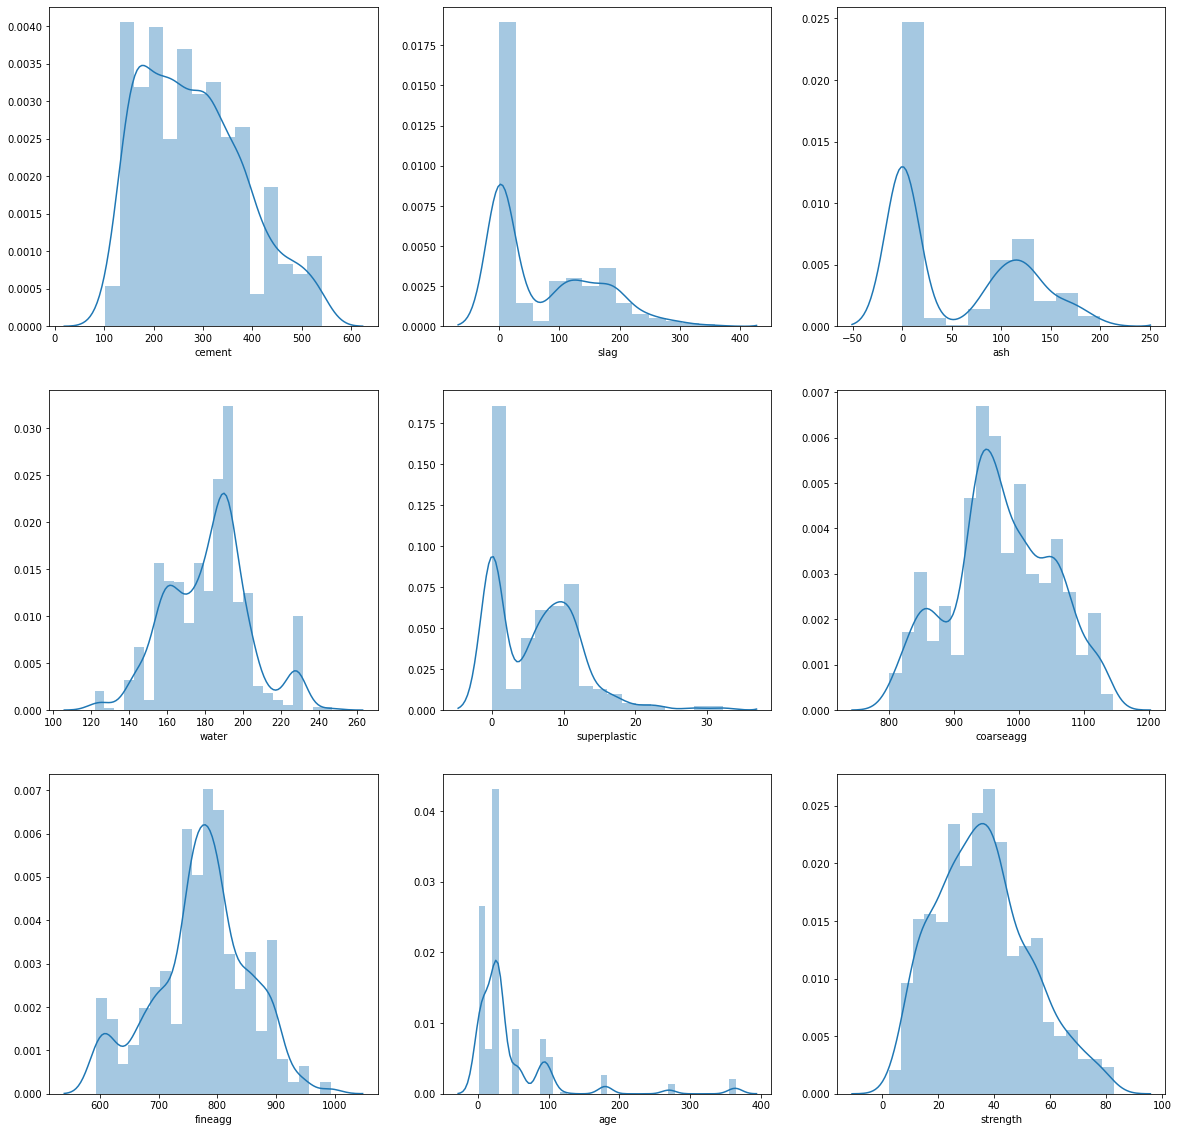

In [115]:
plt.figure(figsize=(20,20))
pos = 1
for x in concrete.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(concrete[x])
    pos += 1 

## 1b) BIVARIATE ANAYLSIS

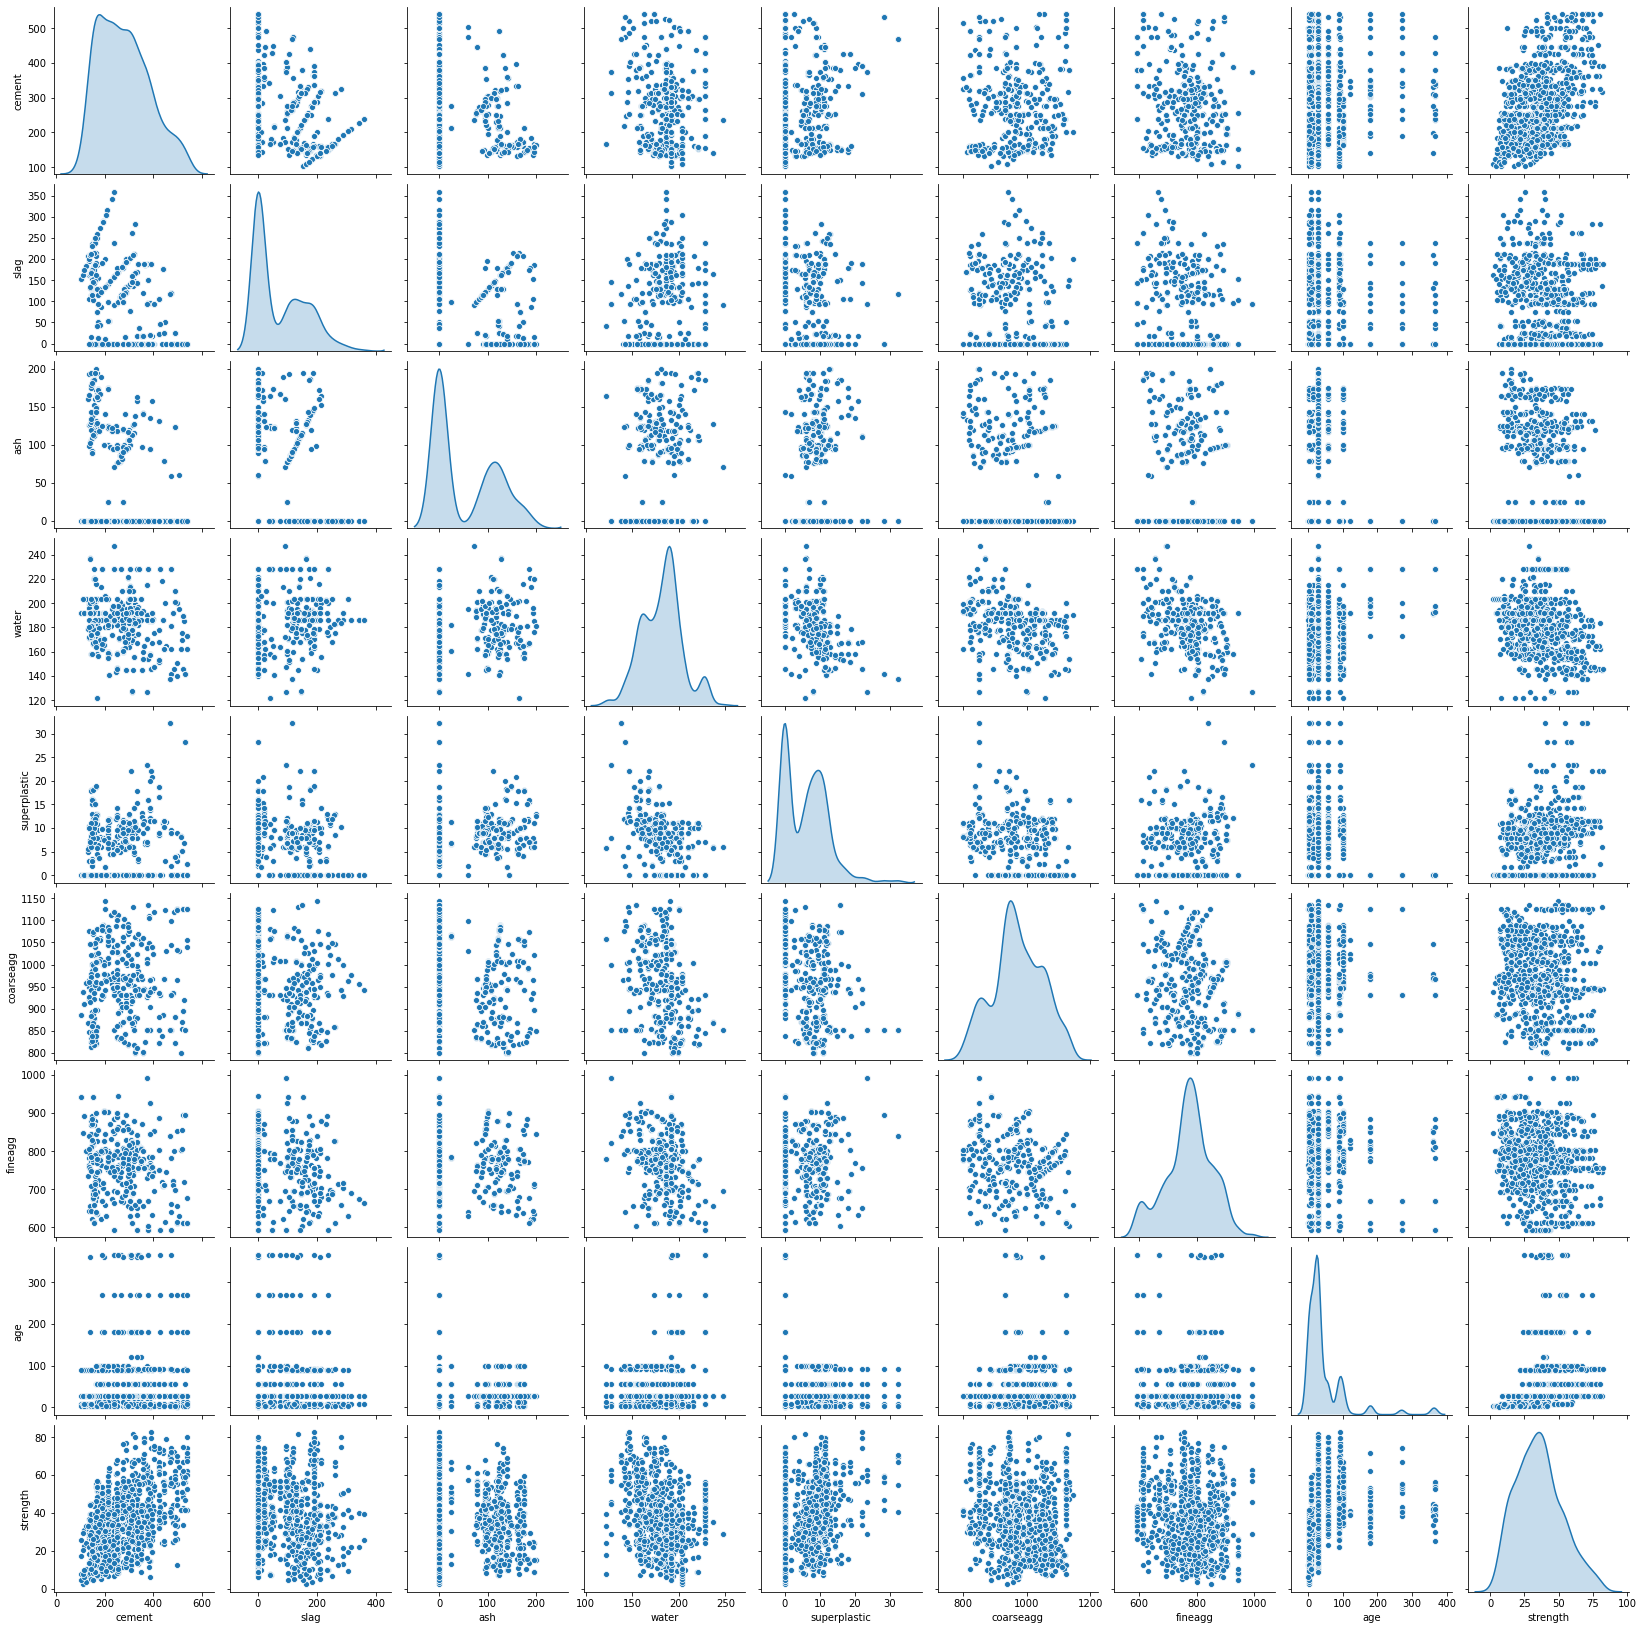

In [116]:
sns.pairplot(concrete,diag_kind='kde')

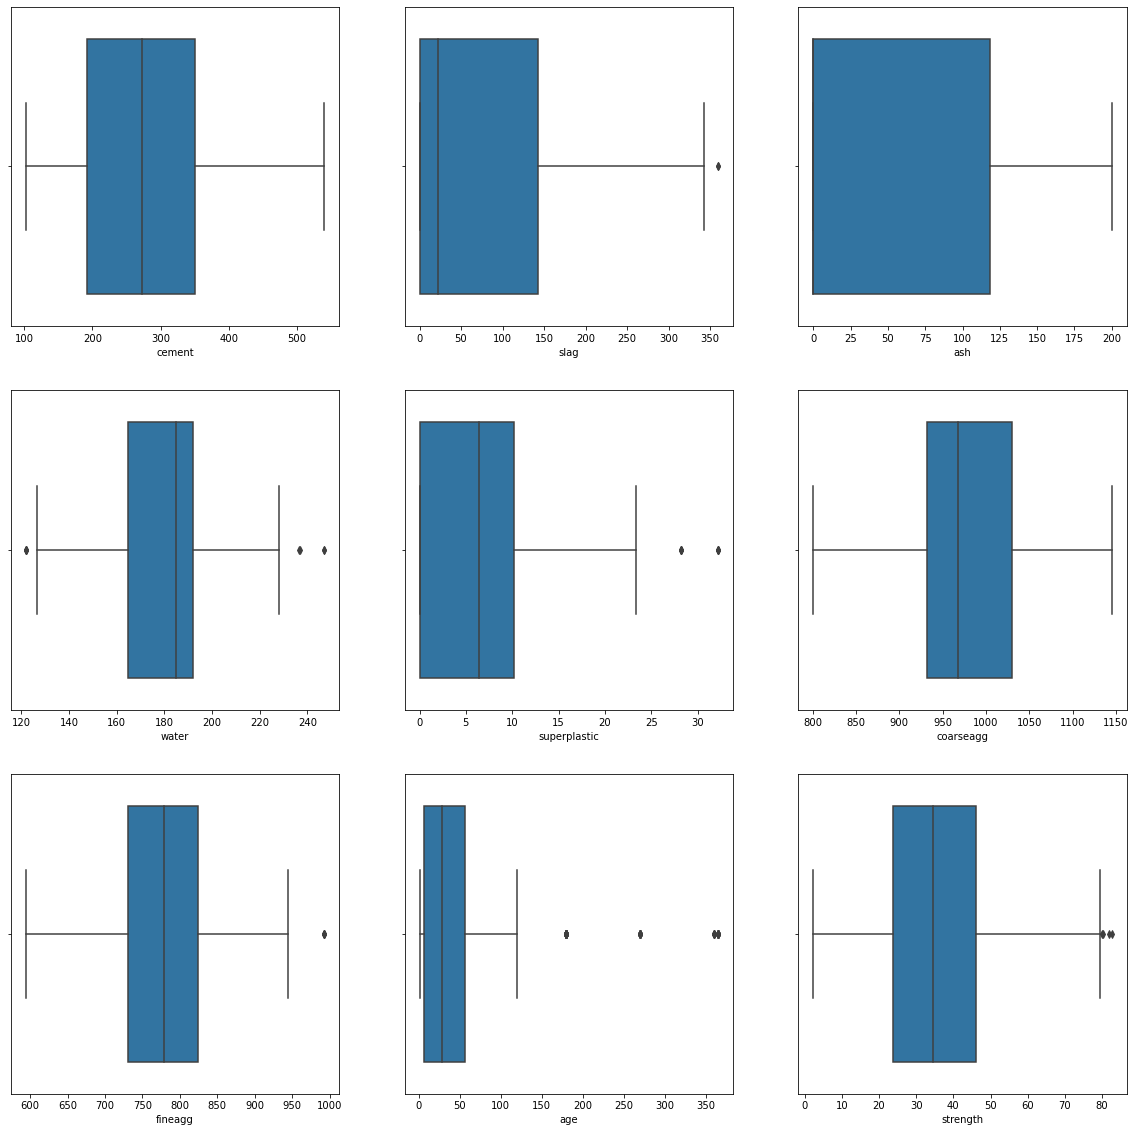

In [117]:
plt.figure(figsize=(20,20))
pos = 1
for x in concrete.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(concrete[x])
    pos += 1 

## 1c) Cleaning outliers, missing values

In [118]:
print(concrete['slag'].quantile(0.10))
print(concrete['slag'].quantile(0.90))

0.0
192.0


In [119]:
concrete['slag'] = np.where(concrete['slag'] >192, 192,concrete['slag'])

In [120]:
print(concrete['water'].quantile(0.10))
print(concrete['water'].quantile(0.90))

154.6
203.5


In [121]:
concrete['water'] = np.where(concrete['water'] <154.6, 154.6,concrete['water'])
concrete['water'] = np.where(concrete['water'] >203.5, 203.5,concrete['water'])

In [122]:
print(concrete['superplastic'].quantile(0.90))

12.21


In [123]:
concrete['superplastic'] = np.where(concrete['superplastic'] >12.21,12.21,concrete['superplastic'])

In [124]:
print(concrete['age'].quantile(0.90))

100.0


In [125]:
concrete['age'] = np.where(concrete['age'] >100,100,concrete['age'])

In [126]:
print(concrete['strength'].quantile(0.90))

58.82


In [127]:
concrete['strength'] = np.where(concrete['strength'] >58.82,58.82,concrete['strength'])

In [128]:
conc=concrete.corr()
conc.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.189859,-0.487282,-0.094977,-0.029190,-0.106941,-0.303953,0.231352,0.667606
slag,-0.189859,1.000000,-0.373187,0.242829,-0.028340,-0.456319,-0.342611,-0.005695,0.142222
ash,-0.487282,-0.373187,1.000000,-0.520844,0.663043,0.046219,0.374800,-0.229426,-0.163850
water,-0.094977,0.242829,-0.520844,1.000000,-0.879102,-0.056028,-0.515602,0.149442,-0.394932
superplastic,-0.029190,-0.028340,0.663043,-0.879102,1.000000,-0.282912,0.414671,-0.198469,0.387258
coarseagg,-0.106941,-0.456319,0.046219,-0.056028,-0.282912,1.000000,-0.159088,-0.009015,-0.279804
fineagg,-0.303953,-0.342611,0.374800,-0.515602,0.414671,-0.159088,1.000000,-0.226916,-0.222648
age,0.231352,-0.005695,-0.229426,0.149442,-0.198469,-0.009015,-0.226916,1.000000,0.578350
strength,0.667606,0.142222,-0.163850,-0.394932,0.387258,-0.279804,-0.222648,0.578350,1.000000


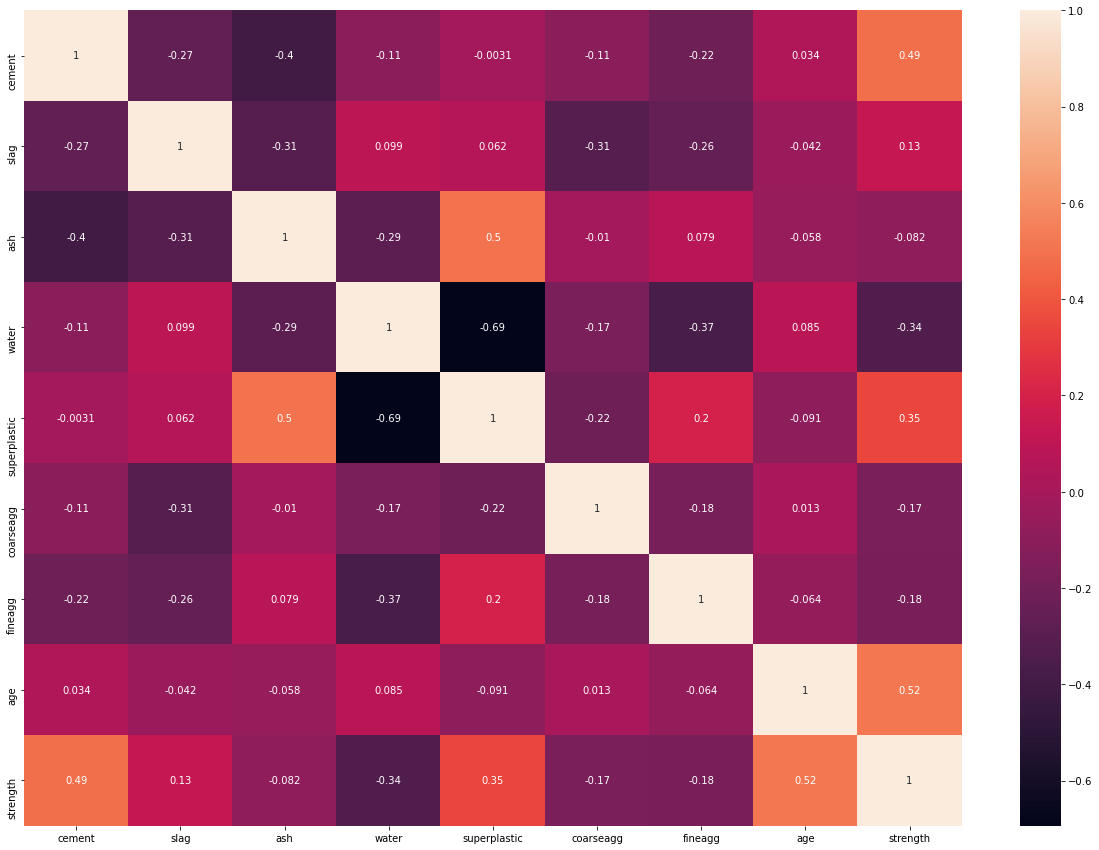

In [129]:
plt.figure(figsize = (21,15))
sns.heatmap(conc,annot=True)

> From the univariate and Bivariate plots, the following were inferred:
   - There are 1030 entries 
   - There are 7 float variables and 1 integer variable
   - The mean, median, IQR, max and min values were found for each variable
   - There are no NaN values in the dataset.
   - From boxplot: slag, water, strength,fineagg, age and superplastic. This was addressed using  IQR values.
   - From pair plot: The presence of a strong correlation is found
   - The correlation table and heatmap were used to further identify the correlation and found that slag column was not necessary.


## 2a) Dropping the comlumns and creating composite feature using PCA

In [130]:
concrete.drop("slag",axis=1,inplace=True)

In [131]:
X= concrete.drop(["strength"],axis=1)
Y= concrete["strength"]

In [132]:
XScaled  = X.apply(zscore)  

In [133]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00097182 -0.39785361 -0.1105727  -0.00314566 -0.10945526 -0.22293429
   0.03444522]
 [-0.39785361  1.00097182 -0.29005863  0.50090961 -0.00997051  0.07918537
  -0.05782743]
 [-0.1105727  -0.29005863  1.00097182 -0.69478271 -0.16582991 -0.3673998
   0.08493554]
 [-0.00314566  0.50090961 -0.69478271  1.00097182 -0.22025317  0.19553158
  -0.09066243]
 [-0.10945526 -0.00997051 -0.16582991 -0.22025317  1.00097182 -0.17865441
   0.01306139]
 [-0.22293429  0.07918537 -0.3673998   0.19553158 -0.17865441  1.00097182
  -0.06453722]
 [ 0.03444522 -0.05782743  0.08493554 -0.09066243  0.01306139 -0.06453722
   1.00097182]]


In [134]:
pca = PCA(n_components=7)
pca.fit(XScaled)

PCA(n_components=7)

In [135]:
print(pca.explained_variance_)

[2.19756257 1.28308336 1.12532679 0.98724856 0.94321309 0.33593821
 0.13443014]


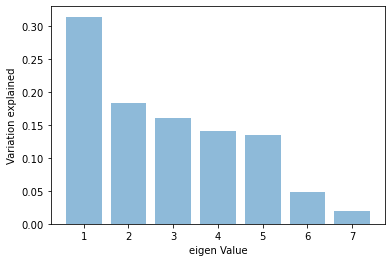

In [136]:
plt.bar(list(range(1,8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

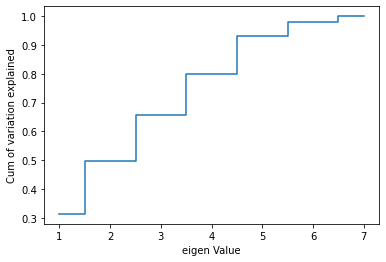

In [137]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [138]:
pca3 = PCA(n_components=5)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.1641551  -0.45763679  0.53672741 -0.58223964  0.07355339 -0.3386982
   0.12812414]
 [ 0.78701829 -0.39329262 -0.28931707  0.23164859 -0.29748134 -0.00729365
   0.00305619]
 [ 0.18586425  0.0437781  -0.35576031  0.03830304  0.8200349  -0.40016277
   0.05401801]
 [ 0.01486117  0.23606839  0.04652912  0.16922321 -0.17146721 -0.22044928
   0.91392041]
 [ 0.10249733  0.38870814  0.23599496  0.23626815 -0.27473965 -0.71150426
  -0.38100371]]
[0.31363272 0.18311966 0.16060489 0.14089858 0.13461391]


In [139]:
Xpca3

array([[ 1.66486874, -1.38703246, -0.72428208, -0.52177886, -0.09007811],
       [-2.11379915, -1.05243079,  1.36310348, -0.58399909, -0.07079323],
       [-0.52783846, -0.56252306, -0.79288901, -0.28350071, -0.31261345],
       ...,
       [-0.80150858,  0.3105908 , -1.00563783,  0.24423374,  0.86609206],
       [ 2.56486559,  0.29155637, -0.27266394,  1.88254988,  0.08072652],
       [ 1.92718774,  1.57839183,  2.90354285, -1.12110318,  0.77608595]])

In [140]:
Xpca3.shape

(1030, 5)

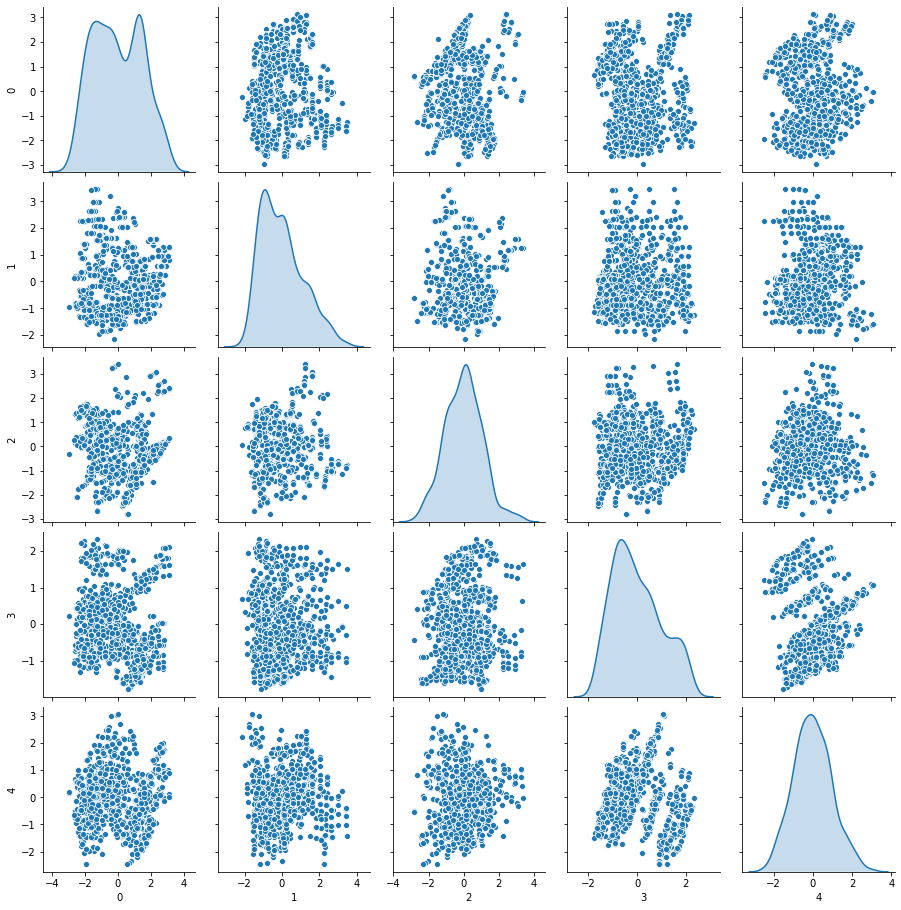

In [141]:
sns.pairplot(pd.DataFrame(Xpca3),diag_kind="kde")

> The slag column was dropped and the composite features were created using the PCA approach.

> By applying the PCA approach it was found that 5 columns were enough to address 95% of data.

## 2c) Exploring for gaussians.

In [142]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2.985872e+07
1,2,2.061332e+07
2,3,1.753534e+07
3,4,1.554850e+07
4,5,1.342985e+07
5,6,1.193349e+07
6,7,1.085218e+07
7,8,9.709619e+06
8,9,8.947878e+06


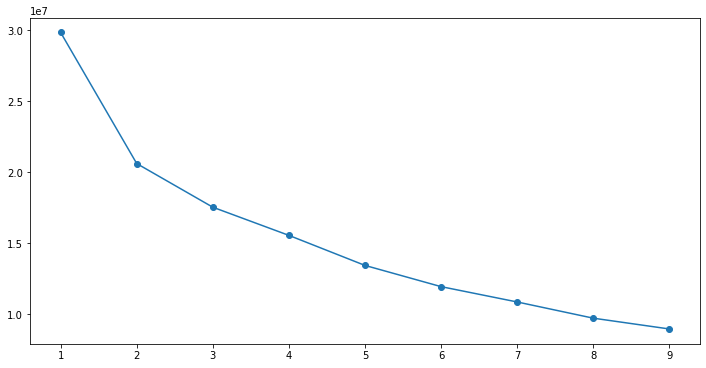

In [143]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [144]:
concrete_z=concrete.apply(zscore)
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_z)

KMeans(n_clusters=6, random_state=2354)

In [145]:
prediction=cluster.predict(concrete_z)
concrete_z["GROUP"] = prediction     

concrete_z_copy = concrete_z.copy(deep = True)  

In [146]:
centroids = cluster.cluster_centers_
centroids

array([[-0.41337011,  0.89286501,  0.70756828,  0.43076016, -1.10759773,
        -0.1444602 , -0.29557802, -0.23310461],
       [ 1.00226109, -0.40040231, -1.0495713 ,  1.0387509 , -0.79608442,
         0.43760889, -0.02128377,  1.08222484],
       [ 1.40087791, -0.79864055,  0.17022492, -0.54273135,  0.98971598,
        -1.53659484, -0.08806364,  0.78697948],
       [-0.69775143,  1.0973249 , -0.84780728,  0.67781733,  0.68000577,
         0.29187448, -0.01983848, -0.11681265],
       [-0.25059863, -0.77118513,  0.620023  , -1.01883429,  0.34964799,
         0.11589743, -0.67796366, -0.98759447],
       [ 0.05754758, -0.69134022,  1.00423018, -1.05044493, -0.12140405,
        -0.30201086,  1.83497679,  0.40062491]])

In [147]:
centroid_df1 = pd.DataFrame(centroids, columns = list(concrete) )
centroid_df1

,cement,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.413370,0.892865,0.707568,0.430760,-1.107598,-0.144460,-0.295578,-0.233105
1,1.002261,-0.400402,-1.049571,1.038751,-0.796084,0.437609,-0.021284,1.082225
2,1.400878,-0.798641,0.170225,-0.542731,0.989716,-1.536595,-0.088064,0.786979
3,-0.697751,1.097325,-0.847807,0.677817,0.680006,0.291874,-0.019838,-0.116813
4,-0.250599,-0.771185,0.620023,-1.018834,0.349648,0.115897,-0.677964,-0.987594
5,0.057548,-0.691340,1.004230,-1.050445,-0.121404,-0.302011,1.834977,0.400625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000146854D4148>,
      dtype=object)

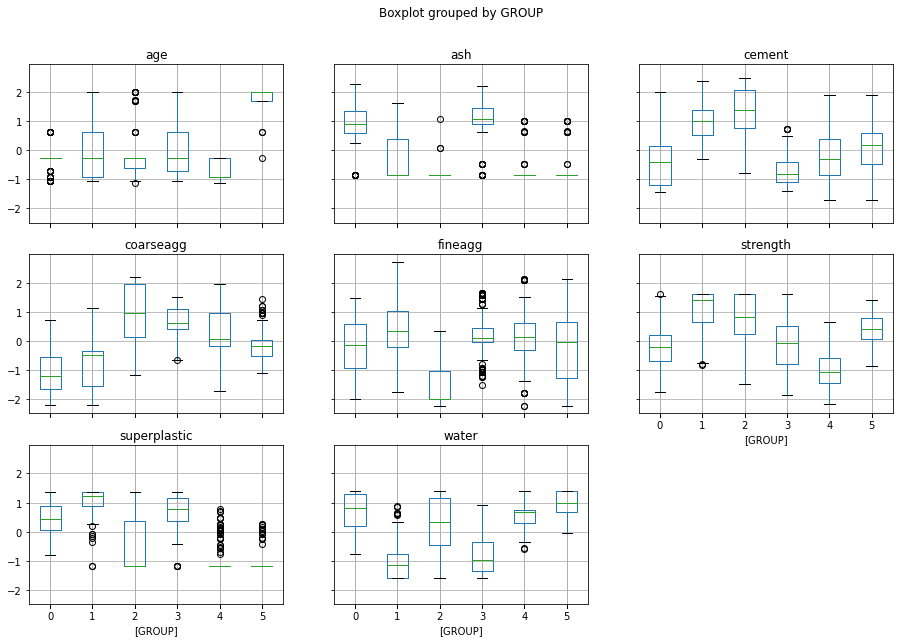

In [148]:
import matplotlib.pylab as pl
concrete_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

> While exploring for guassians the following were found:
- Gaussians are present in the dataset.
- The body of gaussians overlaps so much that exploring them individually is not possible and won't provide any further information. \
  This was found from the pair plot and the KMeans clustering
- Further, the guassians have been addressed in the earlier PCA step.

## 2b) Decision on complexity of the model

In [149]:
X_train,X_test,y_train,y_test = train_test_split(Xpca3,Y,test_size=0.3,random_state=1)

In [150]:

lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test) 
score1 = lr.score(X_test, y_test)
print(f"Decision tree acccuracy score: {score1}")


0.6967629438342466

In [151]:
from sklearn.tree import DecisionTreeRegressor  


dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

score2 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score2}")

Decision tree acccuracy score: 0.7772805261460372


In [152]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

score3 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score3}')

Random Forest accuracy score = 0.8646961909120976


In [153]:
from sklearn.model_selection import cross_val_score

score4 = cross_val_score(dt, Xpca3, Y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score4}')

Cross validation score of Decision tree = 0.7636880207561164


In [154]:
score5 = cross_val_score(rf, Xpca3,Y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score5}')

Cross validation score of Random forest = 0.863724327382168


> Three models were considered and the following were inferred:
- The accuracy of linear regression was 69.6%
- The accuracy of the decision tree was 77%
- The accuracy of Random Forest was 86%
> Cross-validation was applied on the decision tree and random forest:
- The accuracy of the decision tree was 76%. This was a drop from the earlier number.
- The accuracy of the random forest was 86%. The accuracy almost remains the same.

4a) Thus the suitable model was random forest.

## 3) Feature Importance

Feature: 0, Score: 0.04034
Feature: 1, Score: 0.41022
Feature: 2, Score: 0.05505
Feature: 3, Score: 0.41770
Feature: 4, Score: 0.07669


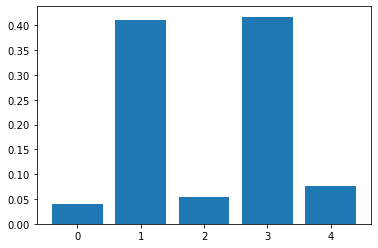

In [155]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

> From the feature importance plot the following was inferred:
- There were two variables with similar importance.
- While the other columns comparatively had low importance.

## 4b) Techniques employed to squeeze that extra performance

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
    

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))
score7= grid.score( X_test, y_test)

 Best cross-validation accuracy: 0.82
 Best parameters:  {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 30}
 Test set accuracy: 0.87


In [157]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from scipy.stats import uniform, truncnorm, randint
model_params = {
    'n_estimators': randint(4,200),
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': uniform(0.01, 0.199)
}
clf = RandomizedSearchCV(rf, model_params, n_iter=100, cv=5, random_state=1)

In [158]:
clf.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( clf.best_score_)) 
print(" Best parameters: ", clf.best_params_) 
print(" Test set accuracy: {:.2f}". format( clf.score( X_test, y_test)))
score8=clf.score( X_test, y_test)

 Best cross-validation accuracy: 0.77
 Best parameters:  {'max_features': array([0.26345595]), 'min_samples_split': 0.013696664233304495, 'n_estimators': 170}
 Test set accuracy: 0.81


- The techniques applied to squeeze out more performance was by tuning the hyperparameters. \
  This was achieved using the GridsearchCV and randomsearchCV on random-forest model.
- The accuracy score was more for GridsearchCV at 87%.

## 4c) Model performance range at 95% confidence level

In [159]:
from sklearn.utils import resample
values = concrete.values
n_iterations = 1000              
n_size = int(len(concrete) * 1)    
stats = list()   
for i in range(n_iterations):
   
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    
    
    rfTree = RandomForestRegressor(n_estimators=100)
    
    rfTree.fit(train[:,:-1], train[:,-1]) 
  
    y_test = test[:,-1]    
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)


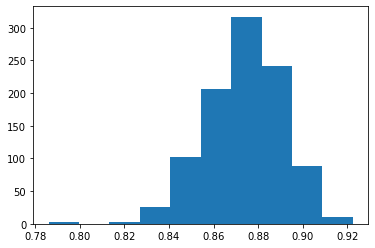

In [160]:
plt.hist(stats)
plt.show()
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

- The model performance at 95% confidence level was analysed using Bootstrapping method.
- The accuracy of the model was around 84% to 90% as shown in the graph.